# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [36]:
df_train = pd.read_csv('Part+3+-+Recurrent+Neural+Networks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')
training_set = df_train.iloc[:,1:2].values

### Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scalled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [38]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scalled[i-60:i])
    y_train.append(training_set_scalled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)


### Reshaping

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [41]:
model = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [42]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

C:\Users\Fatoni Murfid S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [43]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [44]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [45]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

### Adding the output layer

In [46]:
model.add(Dense(units = 1))

### Compiling the RNN

In [47]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [48]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.0989
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0067
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0057
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0055
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0052
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0045
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0038
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0051
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0036
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0033
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0035


### Saving the model

In [49]:
model.save('model_stock_prediction_v2.h5')

model_json = model.to_json()
with open("model_architecture_v2.json", "w") as json_file:
    json_file.write(model_json)
    

# from tensorflow.keras.models import load_model

# # Memuat seluruh model
# loaded_model = load_model('model_cnn.h5')

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [50]:
df_test = pd.read_csv('Part+3+-+Recurrent+Neural+Networks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [51]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


### Visualising the results

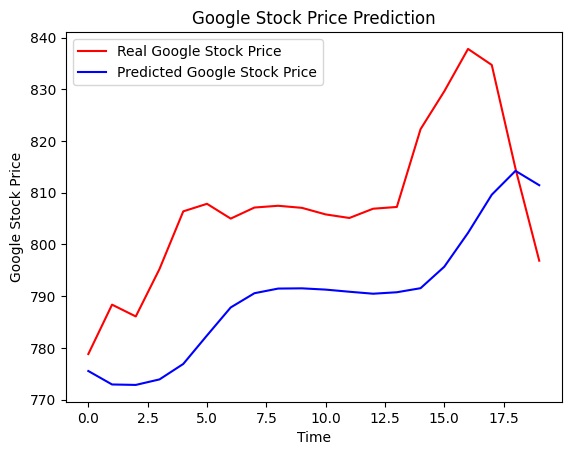

In [52]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [53]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

20.770788181089134
